<a href="https://colab.research.google.com/github/EmmanueleVilla/quantum_computing/blob/main/Colab_19b_Ricerca_dei_triangoli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install qiskit --quiet && pip install pylatexenc --quiet && pip install qiskit-aer --quiet && pip install ipython-autotime --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 89.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, execute, assemble, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.visualization.state_visualization import array_to_latex
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction
from qiskit.circuit.library import QFT
import math
%load_ext autotime

time: 274 µs (started: 2023-08-01 20:38:27 +00:00)


## Soluzione classica

In [5]:
grafo = {
    '0': ['1', '2'],
    '1': ['0', '2'],
    '2': ['0', '1'],
    '3': ['2']
}

time: 658 µs (started: 2023-08-01 20:38:27 +00:00)


In [6]:
def trova_triangoli(grafo):
  triangoli_trovati = []

  # Per ogni vertice nel grafo
  for vertice in grafo:
    # Ottieni tutti i vicini del vertice corrente
    vicini = grafo[vertice]

    # Per ogni vicino del vertice corrente
    for vicino1 in vicini:
        # Per ogni altro vicino del vertice corrente
        for vicino2 in vicini:
            # Verifica se c'è un arco tra vicino1 e vicino2
            if vicino2 in grafo[vicino1]:
              # Abbiamo trovato un triangolo
              triangolo = [vertice, vicino1, vicino2]
              triangolo.sort()
              if triangolo not in triangoli_trovati:
                triangoli_trovati.append(triangolo)

  # Restituisci l'elenco dei triangoli trovati
  return triangoli_trovati

time: 699 µs (started: 2023-08-01 20:38:27 +00:00)


In [7]:
triangoli = trova_triangoli(grafo)
print(triangoli)

[['0', '1', '2']]
time: 1.3 ms (started: 2023-08-01 20:38:27 +00:00)


In [8]:

def genera_grafo_casuale(nodi):
    # Creazione del dizionario del grafo
    grafo = {}
    for nodo in range(1, nodi + 1):
        grafo[nodo] = []

    # Generazione degli archi casuali in modo da ottenere un grafo connesso
    for nodo in range(1, nodi + 1):
        # Genera un numero casuale di archi tra 0 e 10 (inclusi)
        num_archi = np.random.randint(0, 10)
        # Estrae num_archi nodi diversi dal nodo attuale
        archi = np.random.choice(np.arange(1, nodi + 1), size=num_archi, replace=False)
        # Aggiunge gli archi al grafo (grafo non orientato)
        for arco in archi:
          if nodo != arco:
            grafo[nodo].append(arco)
            grafo[arco].append(nodo)

    return grafo

time: 785 µs (started: 2023-08-01 20:38:27 +00:00)


In [9]:
triangoli = trova_triangoli(genera_grafo_casuale(1000))
print(triangoli)

[[1, 858, 929], [1, 723, 929], [2, 631, 807], [2, 249, 302], [3, 459, 912], [3, 303, 416], [11, 125, 827], [14, 602, 835], [14, 835, 865], [14, 68, 581], [17, 363, 730], [22, 521, 634], [34, 56, 909], [36, 769, 813], [38, 947, 982], [39, 312, 929], [44, 303, 476], [47, 578, 617], [54, 62, 562], [56, 551, 985], [56, 372, 909], [58, 113, 955], [61, 200, 294], [65, 847, 906], [72, 811, 928], [72, 293, 811], [76, 395, 403], [92, 150, 893], [96, 310, 874], [101, 618, 790], [106, 411, 824], [108, 154, 672], [113, 376, 570], [119, 567, 657], [120, 846, 989], [131, 736, 807], [141, 592, 629], [150, 664, 780], [150, 487, 685], [155, 289, 442], [162, 308, 996], [166, 182, 825], [169, 530, 779], [169, 215, 927], [171, 237, 363], [177, 465, 533], [177, 663, 709], [182, 338, 948], [185, 903, 1000], [185, 729, 844], [188, 389, 819], [188, 663, 819], [190, 227, 700], [193, 252, 632], [193, 632, 847], [195, 641, 901], [196, 641, 683], [204, 363, 371], [208, 697, 972], [209, 595, 701], [217, 350, 966],

time: 190 ms (started: 2023-08-01 20:38:27 +00:00)


## Soluzione quantistica

### Inizializzazione

In [10]:
# Lo stato W

def control_rotation(qc, control, target, theta):
    theta_dash = math.asin(math.cos(math.radians(theta/2)))
    qc.u(theta_dash, 0, 0, target)
    qc.cx(control, target)
    qc.u(-theta_dash, 0, 0, target)
    return qc


def wn(qc, n):
    for i in range(n):
        if i == 0:
            qc.x(0)
            qc.barrier()
        else:
            p = 1/(n-(i-1))
            theta = math.degrees(math.acos(math.sqrt(p)))
            theta = 2* theta
            qc = control_rotation(qc, i-1, i, theta)
            qc.cx(i, i-1)
            qc.barrier()
    qc.x(range(n))
    return qc

time: 723 µs (started: 2023-08-01 20:38:27 +00:00)


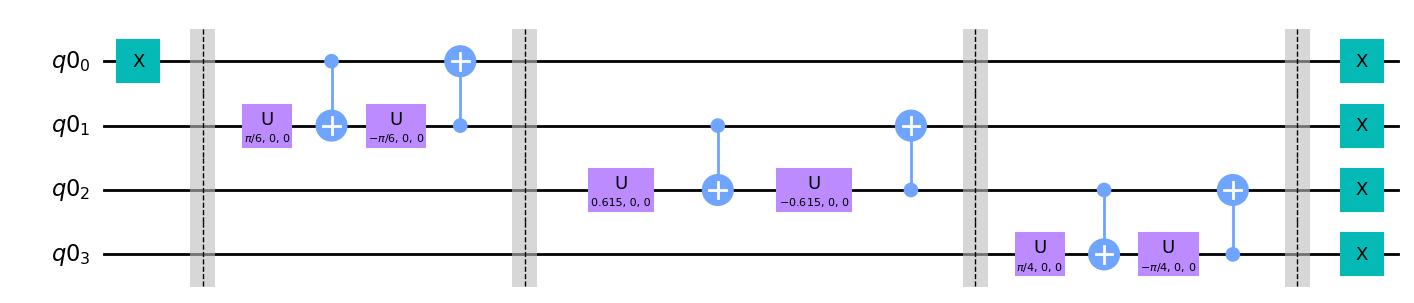

time: 677 ms (started: 2023-08-01 20:38:27 +00:00)


In [11]:
prep_reg = QuantumRegister(4)

qc = QuantumCircuit(prep_reg, name="state_prep")
qc = wn(qc, 4)
qc.draw(output="mpl")

In [12]:
# Creo le istruzioni dritte e invertite
stat_prep = qc.to_instruction()
inv_stat_prep = qc.inverse().to_instruction()

time: 2.14 ms (started: 2023-08-01 20:38:28 +00:00)


### Oracolo

In [59]:
def oracolo(qc, edges, nodi, archi_anc, check_archi_anc):

  for i in range(0, len(edges)):
    if i != 0:
      qc.mct([nodi[edges[i][0]], nodi[edges[i][1]], archi_anc[0]], archi_anc[1], [check_archi_anc[0]])
    qc.ccx(nodi[edges[i][0]], nodi[edges[i][1]], archi_anc[0])

  qc.ccx(archi_anc[0], archi_anc[1], check_archi_anc[0])

  for i in reversed(range(0, len(edges))):
    qc.ccx(nodi[edges[i][0]], nodi[edges[i][1]], archi_anc[0])
    if i != 0:
      qc.mct([nodi[edges[i][0]], nodi[edges[i][1]], archi_anc[0]], archi_anc[1], [check_archi_anc[0]])

time: 1.21 ms (started: 2023-08-01 20:59:51 +00:00)


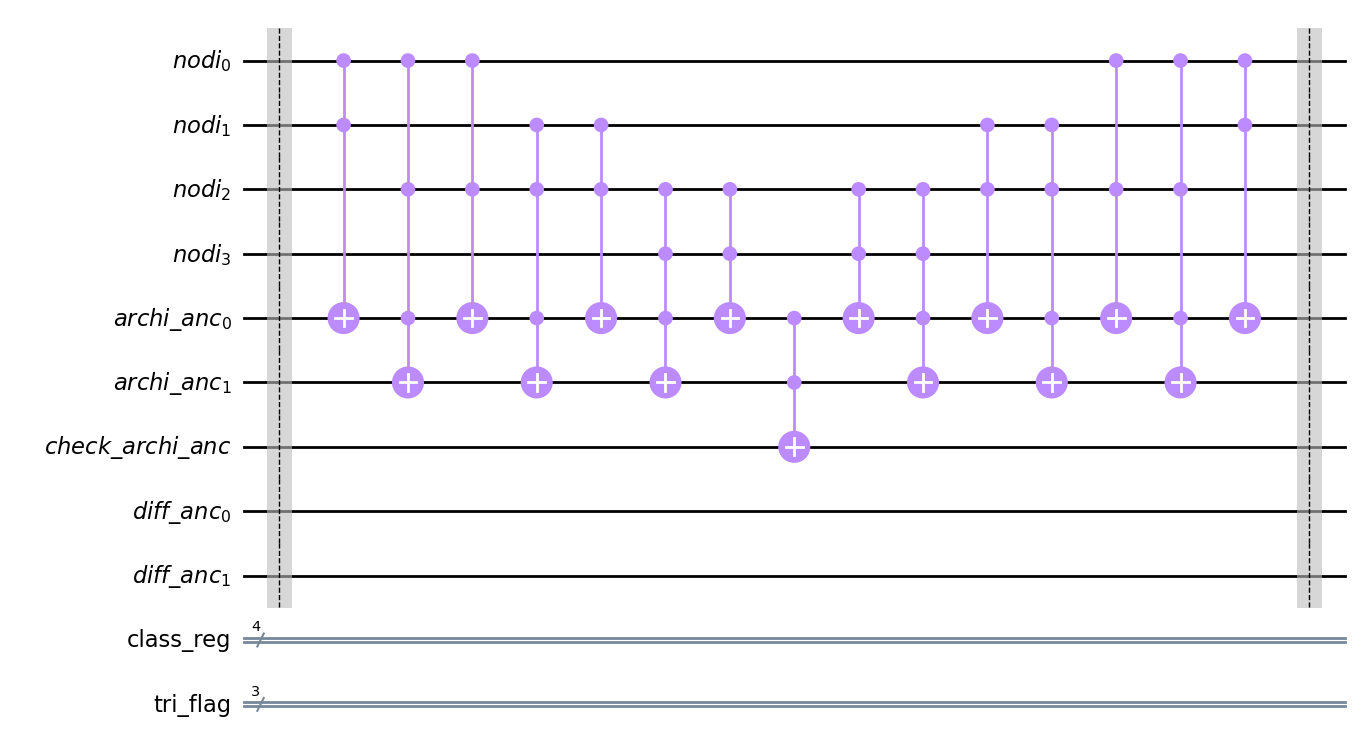

time: 737 ms (started: 2023-08-01 20:53:08 +00:00)


In [46]:
edges =[(0, 1), (0, 2), (1, 2), (2, 3)]
nodi = QuantumRegister(4, name='nodi')
archi_anc = QuantumRegister(2, name='archi_anc')
check_archi_anc = QuantumRegister(1, name='check_archi_anc')
diff_anc = QuantumRegister(2, name = 'diff_anc')
class_bits = ClassicalRegister(4, name='class_reg')
tri_flag = ClassicalRegister(3, name='tri_flag')

qc = QuantumCircuit(nodi, archi_anc, check_archi_anc, diff_anc, class_bits, tri_flag)

oracolo(qc, edges, nodi, archi_anc, check_archi_anc)

qc.draw(output="mpl")

### Diffusion

In [53]:
# Preparazione + multi controlled Z + Inverso della preparazione

def diffusione(qc, nodi, diff_anc, init, inverse_init):
  qc.append(inverse_init, qargs=nodi)
  qc.x(nodi)

  qc.barrier()

  qc.ccx(nodi[2], nodi[3], diff_anc[0])
  qc.ccx(nodi[1], diff_anc[0], diff_anc[1])
  qc.cz(nodi[0], diff_anc[1])
  qc.ccx(nodi[1], diff_anc[0], diff_anc[1])
  qc.ccx(nodi[2], nodi[3], diff_anc[0])

  qc.barrier()

  qc.x(nodi)

  qc.append(init, qargs=nodi)

time: 761 µs (started: 2023-08-01 20:56:35 +00:00)


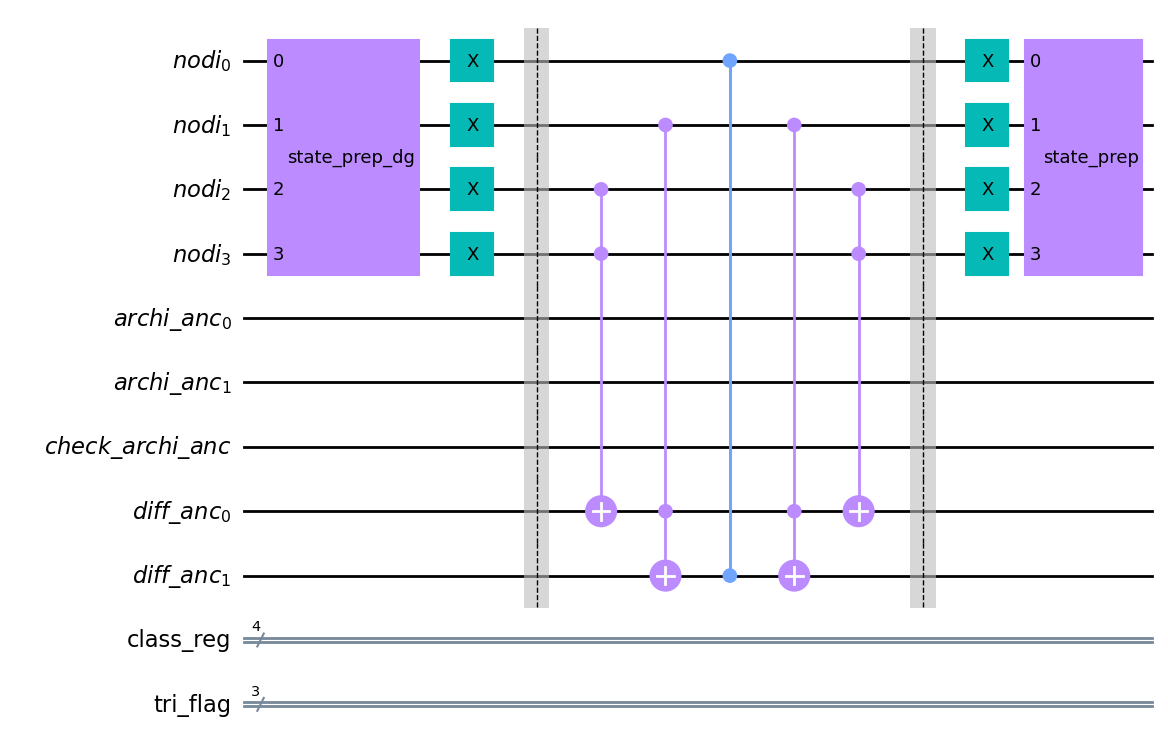

time: 782 ms (started: 2023-08-01 20:56:35 +00:00)


In [54]:
edges =[(0, 1), (0, 2), (1, 2), (2, 3)]
nodi = QuantumRegister(4, name='nodi')
archi_anc = QuantumRegister(2, name='archi_anc')
check_archi_anc = QuantumRegister(1, name='check_archi_anc')
diff_anc = QuantumRegister(2, name = 'diff_anc')
class_bits = ClassicalRegister(4, name='class_reg')
tri_flag = ClassicalRegister(3, name='tri_flag')

qc = QuantumCircuit(nodi, archi_anc, check_archi_anc, diff_anc, class_bits, tri_flag)

diffusione(qc, nodi, diff_anc, stat_prep, inv_stat_prep)

qc.draw(output="mpl")

### Metto tutto insieme!

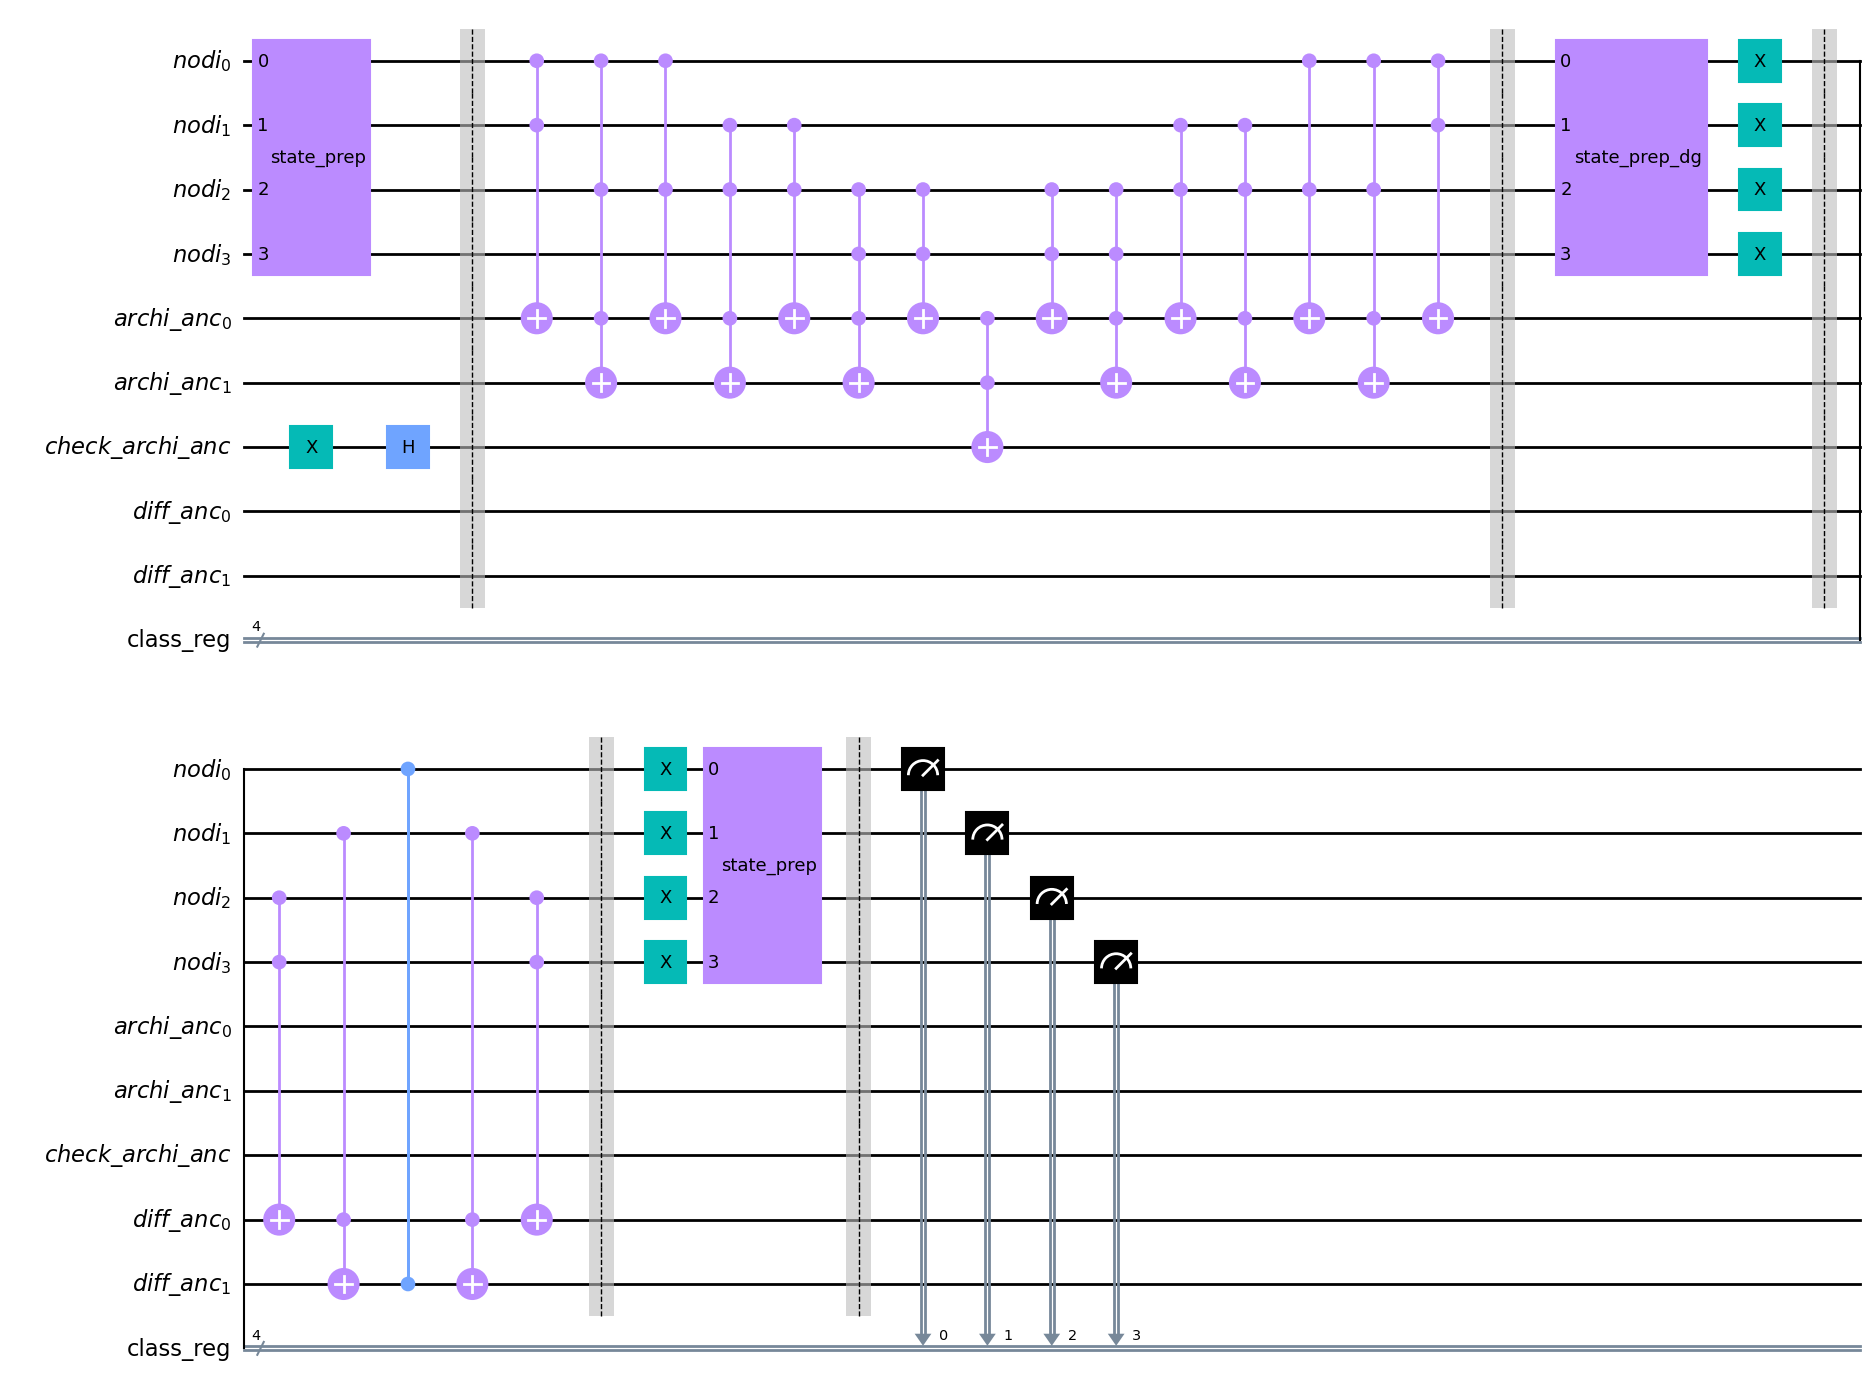

time: 1.28 s (started: 2023-08-01 20:59:55 +00:00)


In [60]:
edges =[(0, 1), (0, 2), (1, 2), (2, 3)]
nodi = QuantumRegister(4, name='nodi')
archi_anc = QuantumRegister(2, name='archi_anc')
check_archi_anc = QuantumRegister(1, name='check_archi_anc')
diff_anc = QuantumRegister(2, name = 'diff_anc')
class_bits = ClassicalRegister(4, name='class_reg')

qc = QuantumCircuit(nodi, archi_anc, check_archi_anc, diff_anc, class_bits)
qc.append(stat_prep, qargs=nodi)
qc.x(check_archi_anc[0])
qc.h(check_archi_anc[0])

qc.barrier()

oracolo(qc, edges, nodi, archi_anc, check_archi_anc)

qc.barrier()

diffusione(qc, nodi, diff_anc, stat_prep, inv_stat_prep)

qc.barrier()

qc.measure(range(4), class_bits)

qc.draw(output="mpl")

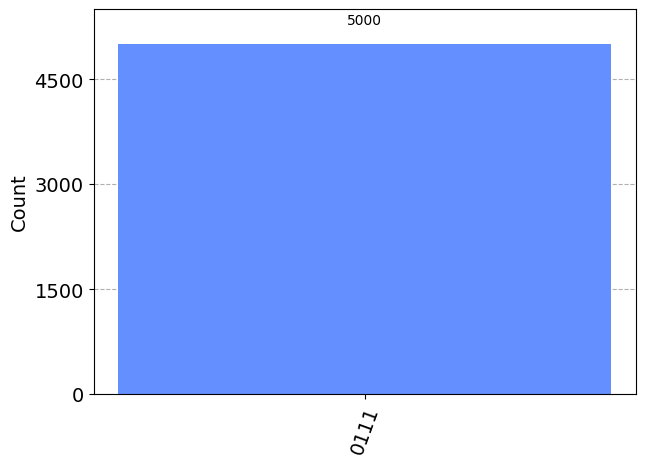

time: 1.1 s (started: 2023-08-01 21:00:35 +00:00)


In [61]:
qasm_simulator = Aer.get_backend('qasm_simulator')
ex = execute(qc, qasm_simulator, shots = 5000)
res = ex.result().get_counts(qc)
plot_histogram(res)

Inverto i qubit, la soluzione è 1110!

Il triangolo è formato dai vertici v0, v1 e v2